
# Hydrogen Wavefunctions Contributions by Lendel Deguia


I will mark my primary contributions and I'll try to make the markings as obvious as possible.

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.special import lpmv



#symbols
x= symbols('x')

#constants
pi=np.pi
e=np.exp(1)


#quantum numbers
n, l, m = 4, 3, 2



num_el=100
th=np.linspace(0, np.pi, num_el)
ph=np.linspace(0, 2*np.pi, num_el)

#generate mesh of polar and azimuth values
TH, PHI = np.meshgrid(th, ph)





#basic functions

def sqrt(x):
    return np.sqrt(x)
def cos(x):
    return np.cos(x)
def sin(x):
    return np.sin(x)
def exp(x):
    return np.exp(x)
def fac(n):
    y=1
    for i in range(1, n+1):
        y=y*i
    return y

##### Primary contribution 1
#######################################################################################################################

#associated legendre poynomials
def asp(a):
    #initiate parameters for qualifying 'a'
    p=np.shape(a)
    n1=np.size(p)
    if m<0:
        m1=np.abs(m)
    else:
        m1=m
    #symbolically determine which legendre polynomial is to be evaluated
    c1=((-1)**m1)/((2**l)*fac(l))
    f1=c1*((1 - x**2)**(m1/2))
    P=(x**2 - 1)**l
    dP1=f1*diff(P, x, l+m1)
    if n1==0:
        #check if 'a' is scalar
        dP=dP1.subs(x, a)
    elif n1==1:
        #check if 'a' is a row vector
        n2=p[0]
        v=np.zeros((1,n2))
        for i in range(0, n2):
            v[0][i]=dP1.subs(x, a[i])
        dP=v
    elif n1==2:
        #check if 'a' is a mxn array
        m2,n2=np.shape(a)
        v=np.zeros((m2,n2))
        for i in range(0, m2):
            for j in range(0, n2):
                v[i][j]=dP1.subs(x, a[i][j])
        dP=v
    else:
        m2,n2,p2=np.shape(a)
        v=np.zeros((m2,n2,p2))
        for i in range(0, m2):
            for j in range(0, n2):
                for k in range(0, p2):
                    v[i][j][k]=dP1.subs(x, a[i][j][k])
        dP=v
    return dP

In the above, I have typed out an algorithm that is supposed to evaluate the associated Legendre polynomials. There may have been a much more efficient way to write this, but I was more focused on getting code to do what I want first and less concerned about optimization.

How I intended for this code to work was to be able to take any n-dimensional array  (where $n\in \mathbb{N}\cup \{0\}$ and $n=0$ would correspond to a scalar value) as input 'a', evaluate the polynomials at every element, and return an evaluated array of the same dimension. 

(side note: I'm referring to dimension analagously to the rank of a tensor, but I'm trying to avoid saying 'rank n' tensor since my knowledge on tensors is very limited. I point this out to emphasize that we can, for example, have a 1-dimensional array which would be a vector, yet that vector can be of any dimension (its number of elements)). 

First off, asp(a) is evaluating the input via the equation (found on Wikipedia):

### $P_{\ell}^{m}(x)=\frac{(-1)^{m}}{2^{\ell} \ell !}\left(1-x^{2}\right)^{m / 2} \frac{d^{\ell+m}}{d x^{\ell+m}}\left(x^{2}-1\right)^{\ell}$

I used sympy to first symbolically evaluate the derivative of this equation. How it works is that you first declare quantum numbers 'l' and 'm' before calling the function, then it evaluates the 'l+m' derivative of $\left(x^{2}-1\right)^{\ell}$. The rest of the function is devoted to evaluating this polynomial by utilizing the .subs function from sympy. Of course, this can only make a substitution one value at a time which is why there are 'for' loops used in the function.

I managed to make this work mostly fine for scalars, 1-d arrays, and 2-d arrays. However, I had quite a bit of trouble making it work for a 3-d array (indicated by the 'else' statement), so I couldn't apply this function to the orbital portion of this project and had to resort to using the (lpmv) function. 

I did, however, use this function for plotting the spherical harmonics as can be seen in the next cell. I can't exactly claim everything in the next cell as "my" code as it is more accurate to say that the next cell is the result of tons of google searches and contantly referring matplotlib reference guides or stackexchange threads. Perhaps one could say, I curated the contents of the next cell. 




 Where indicated in the cell above, you can change 'l' and 'm' (I also have 'n' listed there even though it has no effect here). 
 
This part was pretty challenging for me as it was the first instance where I had to make sense of generating a "mesh" of coordinates for 3-d plotting. Before attempting this part, I tried practicing making 3-d plots such as spheres, parabaloids, and other basic quadric surfaces. 

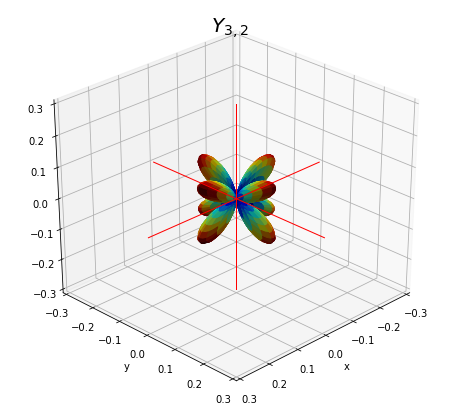

In [3]:
#azimuth factor
def gm(phi):
    if m<0:
        #if m is negative, then use complex term
        y=sin(np.abs(m)*phi) 
    else:
        #otherwise, use real term
        y=cos(m*phi)   
    return y

#polar factor
if m<0:
    m2=np.abs(m)
else:
    m2=m
sgn=((-1)**m2)
c1=((2*l +1)*fac(l-m2))/(4*np.pi*fac(l+m2))
c2=sgn*(np.sqrt(c1))
p1=np.cos(TH)
f=c2*asp(p1)



#evaluation of spherical harmonics
g=gm(PHI)
w=g*f
W=np.abs(w)**2


#express coordinates as cartesian
x=W*sin(TH)*cos(PHI)
y=W*sin(TH)*sin(PHI)
z=W*cos(TH)


#color maps
color_map = plt.cm.jet
scalarMap = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=np.min(W),vmax =np.max(W)), cmap=color_map)
C = scalarMap.to_rgba(W) 

#r adjusts the scaling of the image
#sometimes, the image might be too large or too small so adjust r as needed
r=0.3

#plot surface figure
fig = plt.figure(figsize=2*plt.figaspect(2))
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface (x, y, z, color ='b', facecolors =C)



#generate perpendicular axes for reference
ax.plot([-r, r], [0,0], [0,0], color ='r',  lw=1, zorder=10)
ax.plot([0,0], [-r, r], [0,0], color ='r',  lw=1, zorder=10)
ax.plot([0,0], [0,0], [-r, r], color ='r',  lw=1, zorder=10)

#axes scaling
ax.set_title(r'$Y_{{{},{}}}$'.format(l, m), fontsize=20)
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)
ax.set_zlim(-r,r)
plt.xlabel ('x')
plt.ylabel ('y')

#adjust the view as needed (#height#, #azimuth angle view# i.e. rotattion of plot about z axis)
ax.view_init(30, 45)
plt.show ()

In [4]:
#initiate quantum numbers
n, l, m = 3, 1, 0

a0=1 #Bohr radius unit where in meters: a0=5.29E-11


### Primary contribution 2 
#####################################################################
#function for associated laguerre polynomials
def L(x):
    y=0
    p=(2*l)+1
    q=n+l
    for j in range(0, q-p+1):
        sgn=(-1)**j
        c1=fac(q)
        c2=fac(q-p-j)*fac(p+j)*fac(j)
        c=(sgn*c1)/c2
        y=y+(c*(x**j))
    return y

There really wasn't much to this one; I just typed out

## $\sum_{m=0}^{n}(-1)^{m} \frac{(n+k) !}{(n-m) !(k+m) ! m !} x^{m}$

from: https://mathworld.wolfram.com/AssociatedLaguerrePolynomial.html

and, of course, referenced it in the radial equation in the following cell.

I couldn't find a form for the Legendre polynomials as nice and simple as for the Laguerre. Without all the derivative terms, I was able to write a function directly without having to symbolically operate on the equation.



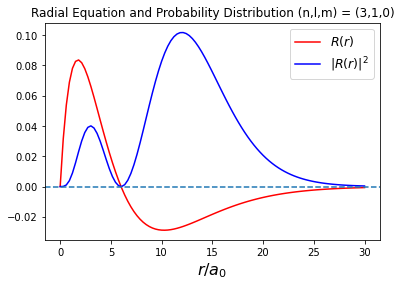

In [5]:
#function for radial distribution that calls on the laguerre function
def R(r):
    r2=(2*r)/(n*a0)
    k1=(2/(n*a0))**3
    k2=(fac(n-l-1))/(2*n*fac(n+l))
    k=sqrt(k1*k2)
    f1=(r2)**l
    f2=exp((-r2)/2)
    return k*f1*f2*L(r2)


#generate radial coordinates in units of the Bohr radius
r1=np.linspace(0, 30,100)

#radial function and distribution
rp1=R(r1)
rp1dist=(rp1**2)*r1*r1


####plot section####
plt.plot(r1, rp1, color='r', label='$R(r)$')
plt.plot(r1, rp1dist, color ='b', label='$|R(r)|^2$')
plt.legend(fontsize=12.5)
plt.axhline(y=0, linestyle='--')
plt.xlabel('$r/{a_0}$', fontsize=16)
plt.title('Radial Equation and Probability Distribution ' + '(n,l,m) = '+ '('+ str(n) + "," +str(l)+ ',' +str(m) +')')
plt.show()

Okay. This part was also really difficult. Dealing with the Spherical Harmonics didn't help completely because now I had to deal with somehow translating a 3d array into a 2d projection. Not everything here is mine, but I did spend hours just trying to make sense of how this worked and googling each and every aspect of how to get the plot to do what I want it to. Also spent time experimenting with color schemes from matplotlib (narrowed down to 'plasma', 'inferno', and 'magma') that best matched these plots: https://en.wikipedia.org/wiki/Atomic_orbital#/media/File:Hydrogen_Density_Plots.png. Turns out it was exactly 'inferno'. 

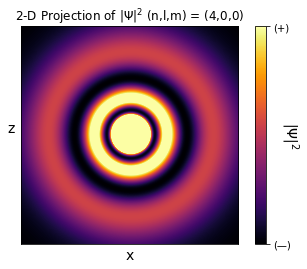

In [6]:
from scipy . special import lpmv
#symbols
x= symbols('x')

#constants
pi=np.pi
e=np.exp(1)


#quantum numbers
n, l, m = 4, 0, 0

a0=1
r=60
d=0.5

rp=-r
rm=r
x = np.arange(rp,rm,d)
y = np.arange(rp,rm,d)
z = np.arange(rp,rm,d)

#generate 3D array of cartesian coordinates
X,Y,Z=np.meshgrid(x,y,z)


#convert cartesian coordinates to spherical
Rs=np.sqrt(X**2 + Y**2 + Z**2)

a1=sqrt(X**2 + Y**2)

Ths=np.arctan2(a1,Z)



Phs=np.arctan2(Y,X)



####build probability distribution####

#Radial Distribution Function
h=R(Rs)

#Theta Distribution Function
if m<0:
    m2=np.abs(m)
else:
    m2=m
m2=m   
sgn=((-1)**m2)
c1=((2*l +1)*fac(l-m2))/(4*np.pi*fac(l+m2))
c2=sgn*(np.sqrt(c1))
f2arg=np.cos(Ths)
f2=c2*lpmv(m,l, f2arg) #asp(f2arg) #

#Azimuth Distribution Function
g2=gm(Phs)

#psi and modulus of psi squared
psi=f2*g2*h
pr1=(np.abs(psi)**2)




####Plot Section####

##initiate plot parameters##

imfit=r
#adjust 'a' up to 'r' to adjust the scaling of the plot; 
#in this case, r=60 so if 'a' exceeds 60, there will be white borders

a=30
fig, ax = plt.subplots()

#Alternating the denominator has the effect of adjusting the brightness of the projection
vmax1=(pr1[int((0-rp)/d),:,:].T.max())/300

#int((0-rp)/d) in the axis-0 argument denotes the point where y=0 for all possible x and z
#this generates an xz plane projection

plt.imshow (pr1[int((0-rp)/d),:,:].T, cmap='inferno', extent=[-imfit,imfit,-imfit,imfit], 
            interpolation=  'bicubic', origin ='lower', vmin=0, vmax=vmax1)
plt.xlabel ('x', fontsize=14)
plt.ylabel ('z', fontsize=14, labelpad=10, rotation=0)
plt.title('2-D Projection of '+'$|{ \Psi}|^{2}$ '+'(n,l,m) = '+ '('+ str(n) + "," +str(l)+ ',' +str(m) +')')


#colorbar
cbar=plt.colorbar()
cbar.set_label(label='$|{\Psi}|^{2}$', rotation=270, labelpad= 10, fontsize=14)
cbar.set_ticks( [vmax1 , 0])
cbar.set_ticklabels(["(+)", "(—)"])

#x and z axis scale, labels and ticks
ax.set_xlim(-a,a)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_ylim(-a,a)
ax.set_yticks([])
ax.set_yticklabels([])
plt.show()





## Summary of my Contribution:

- wrote the Legendre function

- helped the team with my take on how to make sense of the 3d plotting

- curated most necessary bits of code via back and forth googling to get the result we wanted for plotting the spherical harmonics

- wrote the Laguerre function

- helped team with making sense of the projection plotting

- curated most necessary bits of code (googling) to get the result we wanted for plotting the orbital projections